In [1]:
import numpy as np
import scipy.fftpack
from scipy import ndimage
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import os
from SBR import sosf,acf,ps,sosfnorm#packagephd

#Data Load

In [2]:
input_file='datosNGC595r.txt'

In [3]:
data_0=pd.read_table(input_file)
data=(data_0.round(2)).copy()
data_2=(data.round(2)).pivot(index='DE', columns='RA', values='Halpha')

In [4]:
data.describe()

,RA,DE,Halpha,RVHalpha,SigmHalpha,[NII]6548,RV[NII]6548,Sigm[NII]6548,[NII]6584,RV[NII]6584,Sigm[NII]6584,[SII]6717,RV[SII]6717,Sigm[SII]6717,[SII]6731,RV[SII]6731,Sigm[SII]6731
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1.348000e+03,1349.000000,1349.000000,1348.000000,1349.000000,1349.000000
mean,99.897546,10.559674,556.806368,-230.631401,13.868629,26.485901,-225.199362,76.836835,79.455582,-201.231824,76.396049,5.618669e+03,-406.104737,31.773150,32.639993,-432.402913,31.666820
std,58.108225,6.997374,6189.908182,37.798029,15.231398,77.407604,46.497506,92.183523,232.217390,46.250384,91.711734,2.044376e+05,8157.523071,193.161276,100.942770,8156.805636,192.734534
min,0.000000,0.000000,-33.060000,-1077.050000,0.000000,-4.440000,-338.750000,0.000000,-13.310000,-314.180000,0.000000,-9.376000e+02,-299792.000000,0.000000,-226.900000,-299792.000000,0.000000
25%,49.620000,5.000000,46.200000,-239.550000,8.570000,4.280000,-248.560000,15.910000,12.850000,-224.470000,15.770000,1.253000e+01,-198.730000,0.000000,6.240000,-225.010000,0.000000
50%,99.230000,11.000000,96.460000,-231.010000,12.300000,7.170000,-233.220000,39.400000,21.510000,-209.210000,39.170000,2.321000e+01,-186.990000,9.580000,14.435000,-213.300000,9.510000
75%,150.190000,15.000000,232.000000,-222.190000,16.370000,15.920000,-218.620000,71.140000,47.750000,-194.680000,70.750000,4.217750e+01,-176.410000,20.230000,27.485000,-202.740000,20.150000
max,199.810000,22.000000,224500.000000,6.170000,417.080000,1527.000000,195.080000,322.580000,4581.000000,216.820000,320.870000,7.506000e+06,262.610000,3979.740000,2155.000000,235.300000,3970.870000


/home/zalenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


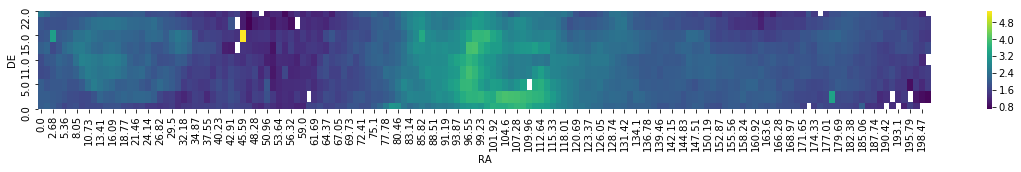

In [5]:
fig, ax = plt.subplots(figsize=(20, 1.8))
sns.heatmap(np.log10(data_2), cmap="viridis")
plt.gca().invert_yaxis()

Here we use the Halpha line as reference to distinguish between useful and unuseful data

/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-9.99754045058884, 209.80754045058885, -1.1306597988717195, 23.13065979887172)

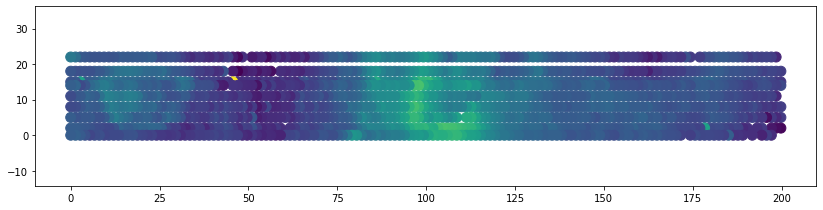

In [6]:
fig, ax = plt.subplots(figsize=(14, 3.3))
plt.scatter(data.RA,data.DE,c=np.log10(data.Halpha), s=100)
plt.axis('equal')


As supposed some data is inadequate

Here we applpy a filter on Coordinates based on the previous images

In [7]:
m=(data.RA<125)&(data.RA>75)
data=data[m]
data.describe()

,RA,DE,Halpha,RVHalpha,SigmHalpha,[NII]6548,RV[NII]6548,Sigm[NII]6548,[NII]6584,RV[NII]6584,Sigm[NII]6584,[SII]6717,RV[SII]6717,Sigm[SII]6717,[SII]6731,RV[SII]6731,Sigm[SII]6731
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,99.875513,10.571848,1270.270938,-232.335572,14.220880,81.020352,-232.458123,23.720587,243.056129,-208.452581,23.536804,119.118182,-182.590909,10.905513,80.552111,-208.910704,10.834252
std,14.737914,7.007872,1792.608599,13.169220,6.576499,138.777278,13.993518,32.863008,416.320610,13.918609,32.705248,222.382224,20.629196,18.541082,145.553830,20.582436,18.507411
min,75.100000,0.000000,54.730000,-264.950000,0.000000,3.670000,-269.990000,0.000000,11.010000,-245.780000,0.000000,-11.050000,-258.280000,0.000000,-8.590000,-284.430000,0.000000
25%,87.170000,5.000000,308.100000,-239.500000,9.710000,15.360000,-240.640000,9.850000,46.080000,-216.590000,9.720000,32.390000,-190.920000,0.000000,19.490000,-217.220000,0.000000
50%,99.230000,11.000000,598.000000,-231.420000,12.670000,31.980000,-232.120000,14.330000,95.950000,-208.120000,14.200000,59.580000,-183.870000,7.500000,37.880000,-210.180000,7.420000
75%,112.640000,15.000000,1264.000000,-222.420000,17.230000,81.490000,-224.290000,24.760000,244.500000,-200.330000,24.600000,130.900000,-176.680000,12.150000,90.490000,-203.010000,12.080000
max,124.710000,22.000000,9957.000000,-207.300000,49.400000,1527.000000,-140.140000,296.270000,4581.000000,-116.630000,294.690000,2900.000000,10.850000,174.090000,1937.000000,-15.900000,173.690000


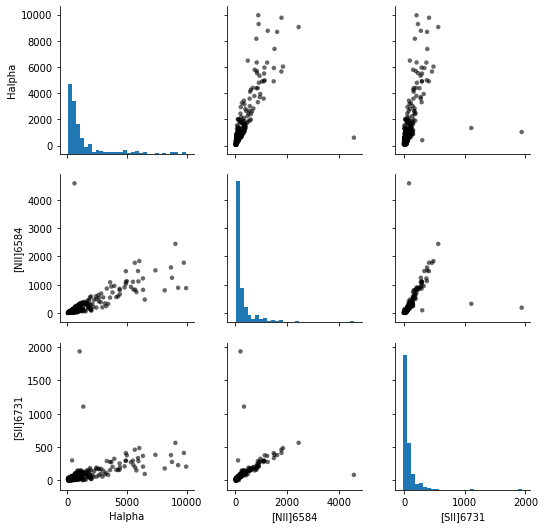

In [8]:
sns.pairplot(data,
             vars=["Halpha", "[NII]6584", "[SII]6731"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.6, s=20, edgecolor='none', color='k'),
             diag_kws=dict(bins=30),
            )

Data looks good, still adjusments will be done individually with each line.

Halpha emission line analysis

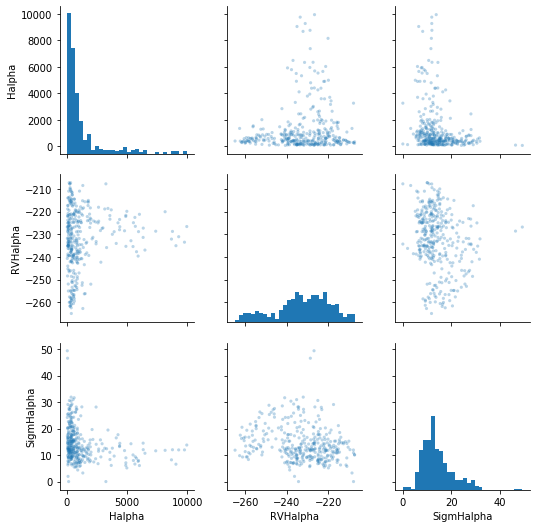

In [9]:
sns.pairplot(data,
             vars=["Halpha", "RVHalpha", "SigmHalpha"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=30),
            )

#Emission map

(72.59938023658108,
 127.21061976341889,
 -1.1309791059264798,
 23.130979105926478)

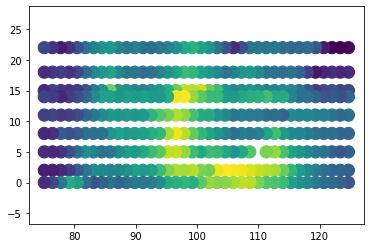

In [10]:
plt.scatter(data.RA,data.DE,c=np.log10(data.Halpha), s=150)
plt.axis('equal')

In [11]:
datal=data.copy()
datal.Halpha=np.log10(datal.Halpha)
dataH_f=(datal.round(2)).pivot(index='DE', columns='RA', values='Halpha')
dataH_rv=(datal.round(2)).pivot(index='DE', columns='RA', values='RVHalpha')
dataH_s=(datal.round(2)).pivot(index='DE', columns='RA', values='SigmHalpha')

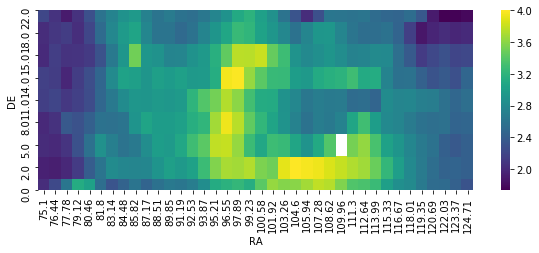

In [12]:
fig, ax = plt.subplots(figsize=(9.75, 3.3))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

The Emission maps reproduce the HII region, data worked in this case. Lets see, how the other maps behave:

#Radial velocity map

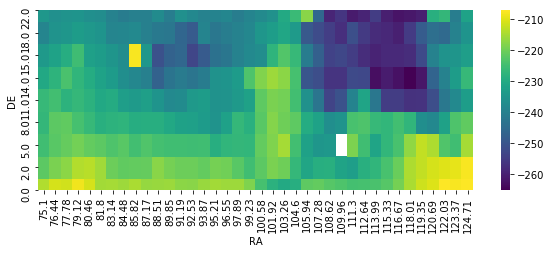

In [13]:
fig, ax = plt.subplots(figsize=(9.75, 3.3))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

Data arragement for statistical analysis

In [14]:
a=[data.RA,data.DE,data.RVHalpha]
dataHstat=pd.DataFrame(a).T
dataHstat.columns=['X','Y','RV']
dataHstat.describe()

,X,Y,RV
count,341.000000,341.000000,341.000000
mean,99.875513,10.571848,-232.335572
std,14.737914,7.007872,13.169220
min,75.100000,0.000000,-264.950000
25%,87.170000,5.000000,-239.500000
50%,99.230000,11.000000,-231.420000
75%,112.640000,15.000000,-222.420000
max,124.710000,22.000000,-207.300000


Strcuture Function

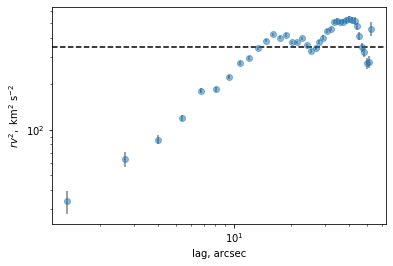

In [15]:
sf_h=sosf(dataHstat)

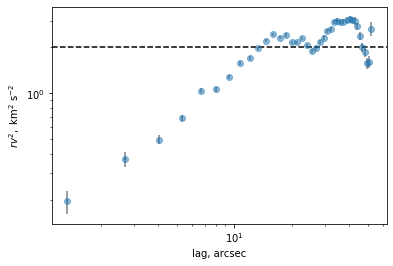

In [16]:
sfn_h2=sosfnorm(dataHstat)

Autocorrelation Function

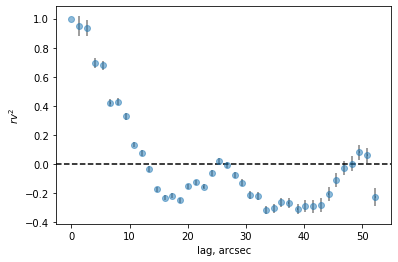

In [97]:
af_h2=acf(dataHstat)

Veocity profiles

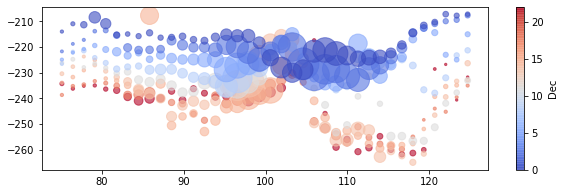

In [18]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(data.RA, data.RVHalpha, c=data.DE, s=data.Halpha*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")
#ax.set(xlim=[65.0, 145.0])

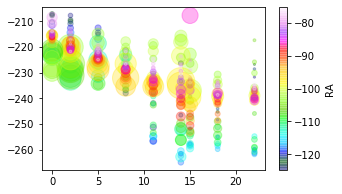

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))
scat = plt.scatter(data.DE, data.RVHalpha, c=-data.RA, s=data.Halpha*0.08, alpha=0.3, cmap="gist_ncar")
fig.colorbar(scat, ax=ax).set_label("RA")



Fit a cubic function to V(Ha) vs RA to try and remove the large-scale trend.


In [20]:
pRA = np.poly1d(np.polyfit(data.RA, data.RVHalpha, 3))
print(pRA)

          3          2
0.000875 x - 0.2535 x + 23.91 x - 964.7


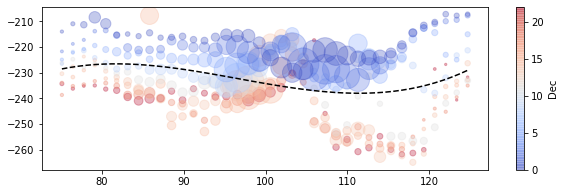

In [21]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(data.RA, data.RVHalpha, c=data.DE, s=data.Halpha*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")
RAgrid = np.linspace(data.RA.min(), data.RA.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")
#ax.set(xlim=[data.RA.max(),data.RA.min()])

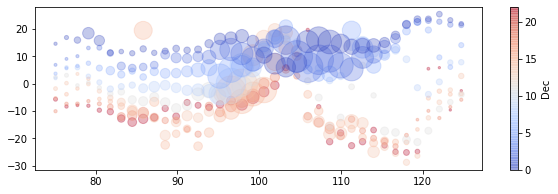

In [22]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(data.RA, data.RVHalpha - pRA(data.RA), c=data.DE, s=data.Halpha*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

In [23]:
df1 = pd.DataFrame({'X': data.RA, 'Y': data.DE, 'RV': data.RVHalpha - pRA(data.RA)})
df1.describe()

,X,Y,RV
count,341.000000,341.000000,3.410000e+02
mean,99.875513,10.571848,-1.054020e-12
std,14.737914,7.007872,1.250573e+01
min,75.100000,0.000000,-2.882013e+01
25%,87.170000,5.000000,-9.327395e+00
50%,99.230000,11.000000,-2.106376e-01
75%,112.640000,15.000000,1.039361e+01
max,124.710000,22.000000,2.534260e+01


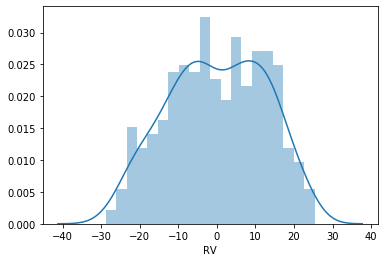

In [24]:
sns.distplot(df1['RV'],bins=20)

In [25]:
#ps_2=ps(df1)

#Sigma map

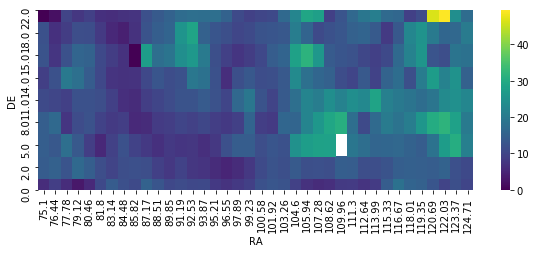

In [26]:
fig, ax = plt.subplots(figsize=(9.75, 3.3))
sns.heatmap(dataH_s, cmap="viridis")
plt.gca().invert_yaxis()

I vs Sigma diagnostic diagram

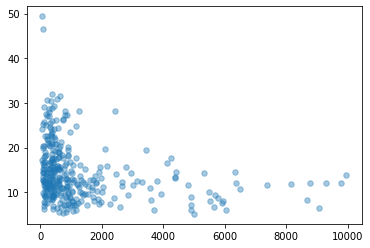

In [27]:
m1=(data.SigmHalpha>5)
plt.scatter(data[m1].Halpha,data[m1].SigmHalpha, alpha=0.4, s=30)

In [28]:
argo=(data.Halpha*data.RVHalpha)/np.sum(data.Halpha)

In [29]:
dfav = pd.DataFrame({'X': data.RA, 'Y': data.DE, 'RV': argo})
dfav.describe()

,X,Y,RV
count,341.000000,341.000000,341.000000
mean,99.875513,10.571848,-0.674854
std,14.737914,7.007872,0.947015
min,75.100000,0.000000,-5.265438
25%,87.170000,5.000000,-0.655943
50%,99.230000,11.000000,-0.326059
75%,112.640000,15.000000,-0.169150
max,124.710000,22.000000,-0.028662


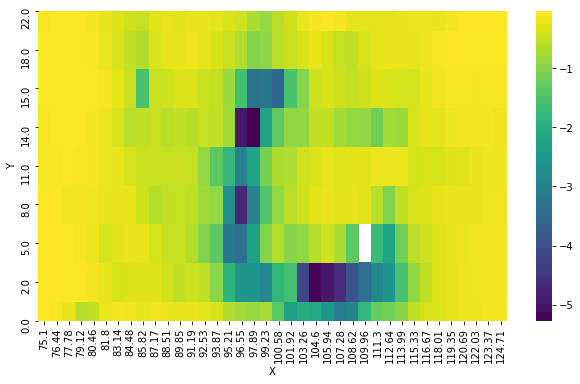

In [30]:
dataO1_rv=(dfav.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(10.5, 5.7))
sns.heatmap(dataO1_rv, cmap="viridis")
plt.gca().invert_yaxis()
#plt.axis('equal')

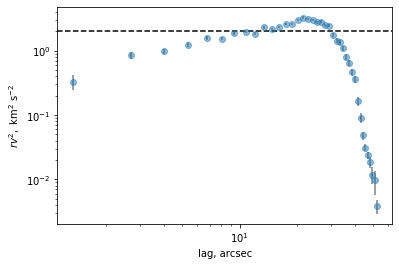

In [31]:
sfn_Hav=sosfnorm(dfav)

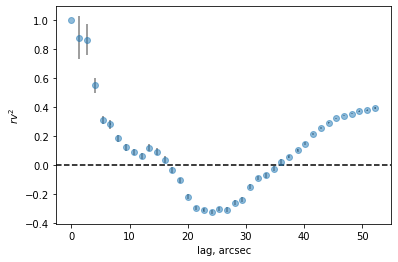

In [32]:
ac_Hav=acf(dfav)

#[NII] 6585 emission line

In [33]:
dataN=data.copy()

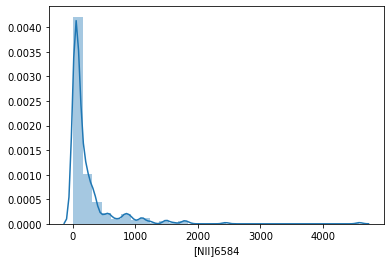

In [34]:
sns.distplot(dataN['[NII]6584'],bins=30)

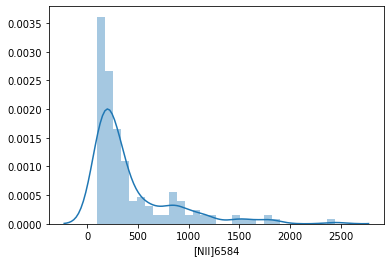

In [35]:
mnf=(dataN['[NII]6584']<4000)&(dataN['[NII]6584']>100)
sns.distplot(dataN[mnf]['[NII]6584'], bins=30)

In [36]:
dataN=dataN[mnf]

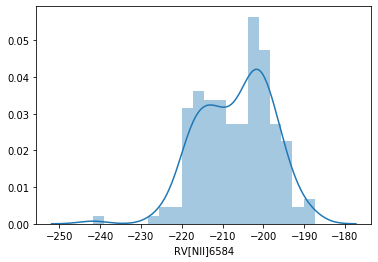

In [37]:
sns.distplot(dataN['RV[NII]6584'], bins=20)

In [111]:
dataN['RV[NII]6584'].describe()

count    162.000000
mean    -206.581790
std        8.407644
min     -226.150000
25%     -213.550000
50%     -205.435000
75%     -200.375000
max     -187.440000
Name: RV[NII]6584, dtype: float64

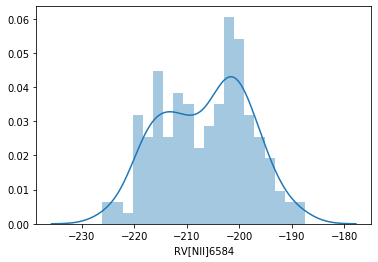

In [38]:
mnrv=(dataN['RV[NII]6584']>-230)&(dataN['RV[NII]6584']<-180)
sns.distplot(dataN[mnrv]['RV[NII]6584'], bins=20)

In [39]:
dataN=dataN[mnrv]

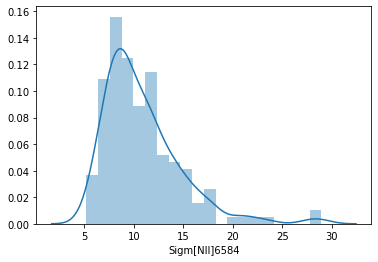

In [40]:
sns.distplot(dataN['Sigm[NII]6584'], bins=20)

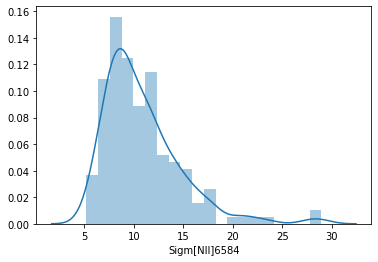

In [41]:
mns=(dataN['Sigm[NII]6584']>5)&(dataN['Sigm[NII]6584']<40)
sns.distplot(dataN[mns]['Sigm[NII]6584'], bins=20)

In [42]:
dataN=dataN[mns]

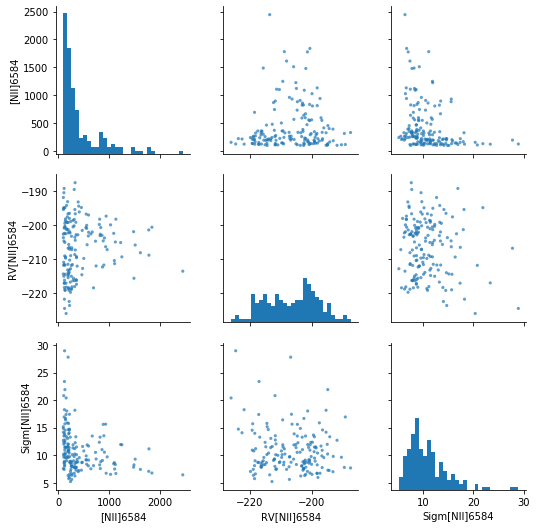

In [43]:
sns.pairplot(dataN,
             vars=["[NII]6584", "RV[NII]6584", "Sigm[NII]6584"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.7, s=10, edgecolor='none'),
             diag_kws=dict(bins=30),
            )

In [44]:
dataNl=dataN.copy()
dataNl.Halpha=np.log10(data['[NII]6584'])
dataN_f=(dataN.round(2)).pivot(index='DE', columns='RA', values='[NII]6584')
dataN_rv=(dataN.round(2)).pivot(index='DE', columns='RA', values='RV[NII]6584')
dataN_s=(dataN.round(2)).pivot(index='DE', columns='RA', values='Sigm[NII]6584')

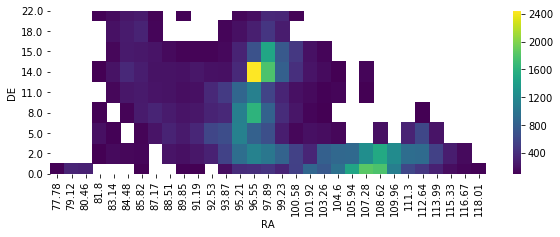

In [45]:
fig, ax = plt.subplots(figsize=(9.75, 3))
sns.heatmap(dataN_f, cmap="viridis")
plt.gca().invert_yaxis()

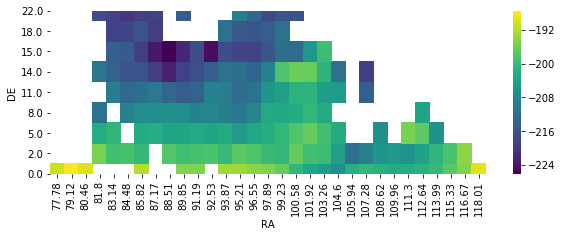

In [46]:
fig, ax = plt.subplots(figsize=(9.75, 3))
sns.heatmap(dataN_rv, cmap="viridis")
plt.gca().invert_yaxis()


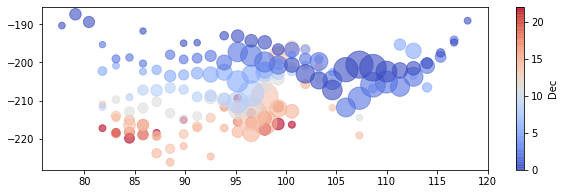

In [47]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dataN.RA, dataN['RV[NII]6584'], c=dataN.DE, s=dataN['[NII]6584']*0.4, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

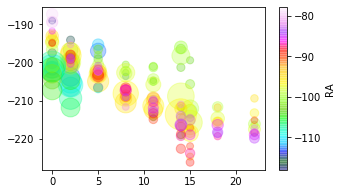

In [48]:
fig, ax = plt.subplots(figsize=(5, 3))
scat = plt.scatter(dataN.DE, dataN['RV[NII]6584'], c=-dataN.RA, s=dataN['[NII]6584']*0.4, alpha=0.3, cmap="gist_ncar")
fig.colorbar(scat, ax=ax).set_label("RA")

In [49]:
a=[dataN.RA,dataN.DE,dataN['RV[NII]6584']]
dataNstat=pd.DataFrame(a).T
dataNstat.columns=['X','Y','RV']
dataNstat.describe()

,X,Y,RV
count,162.000000,162.000000,162.000000
mean,96.022469,8.648148,-206.581790
std,9.347888,6.753395,8.407644
min,77.780000,0.000000,-226.150000
25%,88.510000,2.000000,-213.550000
50%,95.210000,8.000000,-205.435000
75%,101.920000,14.000000,-200.375000
max,118.010000,22.000000,-187.440000


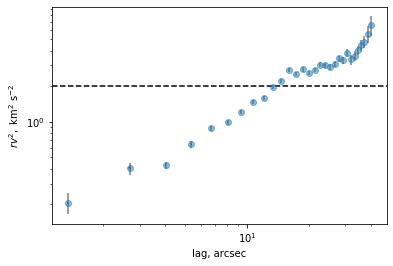

In [50]:
sfn_n=sosfnorm(dataNstat)

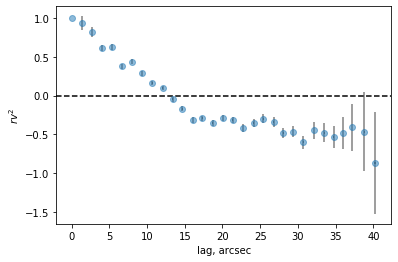

In [51]:
af_n=acf(dataNstat)

In [52]:
#psn=ps(dataNstat)

Since the image has missing data the FFT can not be performed.
To resolve this issue we filter again raw data but just for [NII]

In [53]:
mNN=(data_0.RA<120)&(data_0.RA>90)
dataNN=data_0[mNN]
dataNN.describe()

,RA,DE,Halpha,RVHalpha,SigmHalpha,[NII]6548,RV[NII]6548,Sigm[NII]6548,[NII]6584,RV[NII]6584,Sigm[NII]6584,[SII]6717,RV[SII]6717,Sigm[SII]6717,[SII]6731,RV[SII]6731,Sigm[SII]6731
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,105.245279,10.583756,1891.738528,-235.333503,14.952690,107.565888,-234.238782,20.241574,322.691421,-210.223604,20.076244,128.272234,-183.940254,12.427766,89.705939,-210.256904,12.348274
std,8.544852,7.018150,2132.262695,14.180867,5.912489,140.739832,12.464618,19.424047,422.201803,12.397754,19.339497,148.117069,17.763097,20.781395,108.495515,17.722456,20.746759
min,91.190000,0.000000,74.990000,-264.950000,5.150000,3.710000,-269.990000,6.590000,11.120000,-245.780000,6.430000,-2.630000,-226.990000,0.000000,-8.590000,-253.200000,0.000000
25%,97.890000,5.000000,512.700000,-247.500000,10.920000,17.200000,-241.230000,9.880000,51.610000,-217.180000,9.750000,28.590000,-191.010000,2.270000,15.380000,-217.310000,2.030000
50%,104.600000,11.000000,995.200000,-233.020000,13.560000,43.170000,-232.170000,14.330000,129.500000,-208.160000,14.200000,68.400000,-183.690000,8.360000,42.820000,-210.000000,8.280000
75%,112.640000,15.000000,2178.000000,-224.020000,17.770000,130.800000,-225.300000,24.760000,392.400000,-201.330000,24.600000,181.300000,-176.810000,13.780000,121.800000,-203.190000,13.710000
max,119.350000,22.000000,9957.000000,-211.680000,31.660000,814.900000,-207.310000,202.910000,2445.000000,-183.440000,201.820000,748.800000,-73.740000,174.090000,563.600000,-100.300000,173.690000


In [54]:
a=[dataNN.RA,dataNN.DE,dataNN['RV[NII]6584']]
dataNNstat=pd.DataFrame(a).T
dataNNstat.columns=['X','Y','RV']
dataNNstat.describe()

,X,Y,RV
count,197.000000,197.000000,197.000000
mean,105.245279,10.583756,-210.223604
std,8.544852,7.018150,12.397754
min,91.190000,0.000000,-245.780000
25%,97.890000,5.000000,-217.180000
50%,104.600000,11.000000,-208.160000
75%,112.640000,15.000000,-201.330000
max,119.350000,22.000000,-183.440000


(0.0, 22.0, 0.0, 9.0)

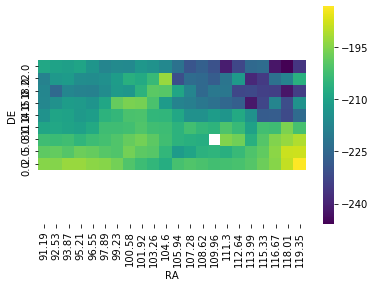

In [55]:
dataNN_rv=(dataNN.round(2)).pivot(index='DE', columns='RA', values='RV[NII]6584')
sns.heatmap(dataNN_rv, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

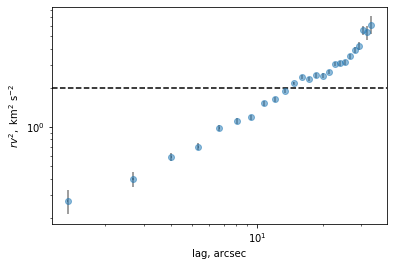

In [56]:
sfn_n2=sosfnorm(dataNNstat)

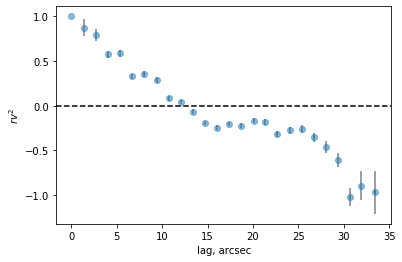

In [57]:
af_n2=acf(dataNNstat)

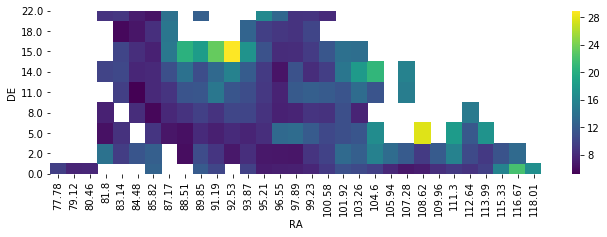

In [58]:
fig, ax = plt.subplots(figsize=(11, 3))
sns.heatmap(dataN_s, cmap="viridis")
plt.gca().invert_yaxis()

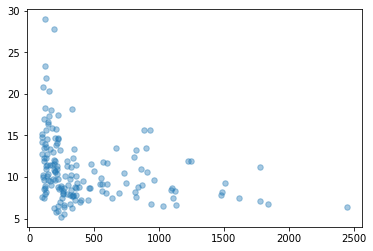

In [59]:
plt.scatter(dataN['[NII]6584'],dataN['Sigm[NII]6584'], alpha=0.4, s=30)

#[SII] 6731 emission line

In [60]:
dataS=data.copy()

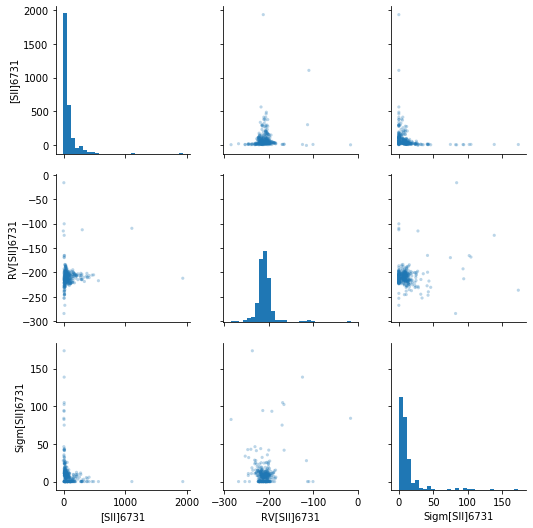

In [61]:
sns.pairplot(dataS,
             vars=["[SII]6731", "RV[SII]6731", "Sigm[SII]6731"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=30),
            )

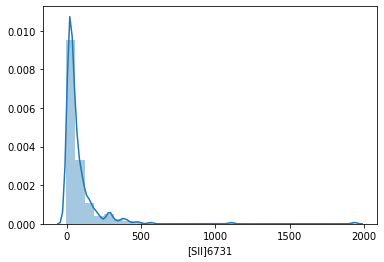

In [62]:
sns.distplot(dataS['[SII]6731'], bins=30)

/home/zalenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


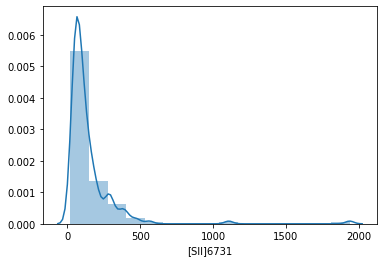

In [63]:
msf=(dataS['[SII]6731']<2000)&(dataN['[SII]6731']>10)
sns.distplot(dataN[msf]['[SII]6731'], bins=15)

In [64]:
dataS=dataS[msf]

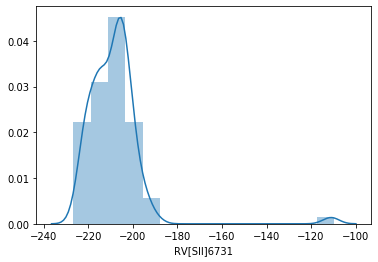

In [65]:
sns.distplot(dataS['RV[SII]6731'], bins=15)

In [112]:
dataS['RV[SII]6731'].describe()

count     75.000000
mean    -209.235200
std        7.853934
min     -226.880000
25%     -214.970000
50%     -207.600000
75%     -204.280000
max     -188.890000
Name: RV[SII]6731, dtype: float64

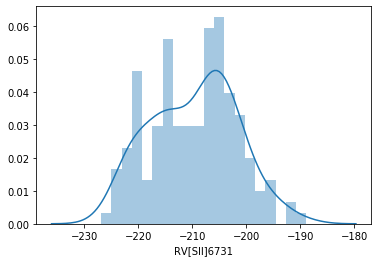

In [66]:
msrv=(dataS['RV[SII]6731']>-250)&(dataS['RV[SII]6731']<-150)
sns.distplot(dataS[msrv]['RV[SII]6731'], bins=20)

In [67]:
dataS=dataS[msrv]

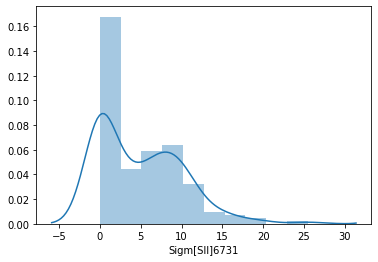

In [68]:
sns.distplot(dataS['Sigm[SII]6731'],  bins=10)

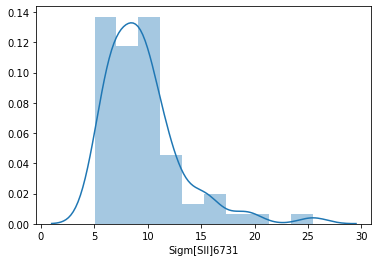

In [69]:
mss=(dataS['Sigm[SII]6731']>5)&(dataS['Sigm[SII]6731']<50)
sns.distplot(dataS[mss]['Sigm[SII]6731'], bins=10 )

In [70]:
dataS=dataS[mss]

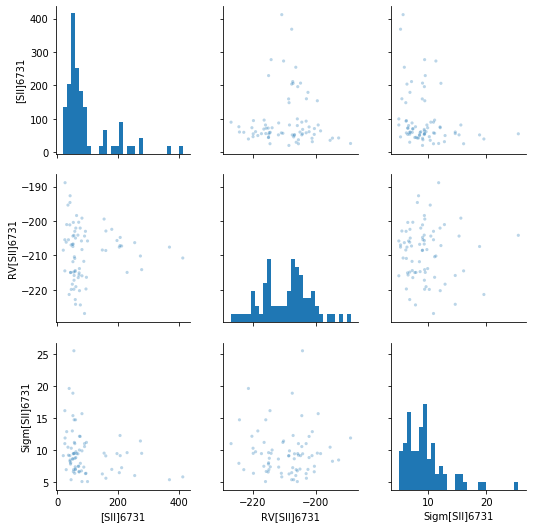

In [71]:
sns.pairplot(dataS,
             vars=["[SII]6731", "RV[SII]6731", "Sigm[SII]6731"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=30),
            )

In [72]:
dataSl=data.copy()
dataSl.Halpha=np.log10(data['[SII]6731'])
dataS_f=(dataS.round(2)).pivot(index='DE', columns='RA', values='[SII]6731')
dataS_rv=(dataS.round(2)).pivot(index='DE', columns='RA', values='RV[SII]6731')
dataS_s=(dataS.round(2)).pivot(index='DE', columns='RA', values='Sigm[SII]6731')

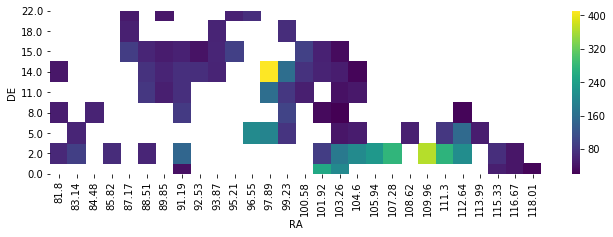

In [73]:
fig, ax = plt.subplots(figsize=(11, 3))
sns.heatmap(dataS_f, cmap="viridis")
plt.gca().invert_yaxis()

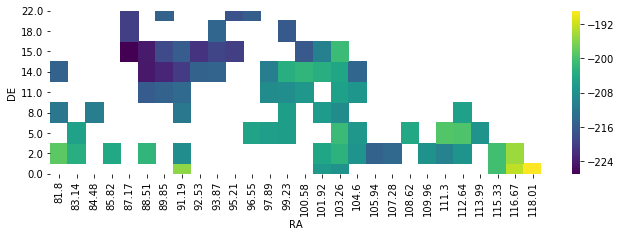

In [74]:
fig, ax = plt.subplots(figsize=(11, 3))
sns.heatmap(dataS_rv, cmap="viridis")
plt.gca().invert_yaxis()

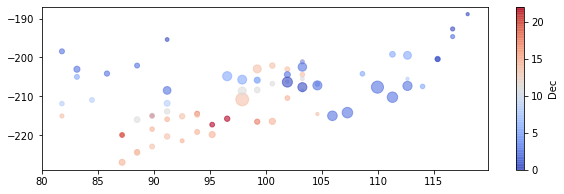

In [75]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dataS.RA, dataS['RV[SII]6731'], c=dataS.DE, s=dataS['[SII]6731']*0.4, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

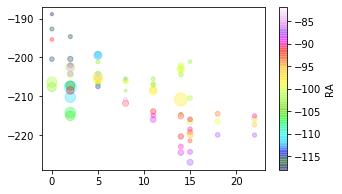

In [76]:
fig, ax = plt.subplots(figsize=(5, 3))
scat = plt.scatter(dataS.DE, dataS['RV[SII]6731'], c=-dataS.RA, s=dataS['[SII]6731']*0.4, alpha=0.3, cmap="gist_ncar")
fig.colorbar(scat, ax=ax).set_label("RA")

In [77]:
a=[dataS.RA,dataS.DE,dataS['RV[SII]6731']]
dataSstat=pd.DataFrame(a).T
dataSstat.columns=['X','Y','RV']
dataSstat.describe()

,X,Y,RV
count,75.000000,75.000000,75.000000
mean,98.466133,9.120000,-209.235200
std,9.556796,6.364938,7.853934
min,81.800000,0.000000,-226.880000
25%,91.190000,2.000000,-214.970000
50%,99.230000,8.000000,-207.600000
75%,103.930000,14.000000,-204.280000
max,118.010000,22.000000,-188.890000


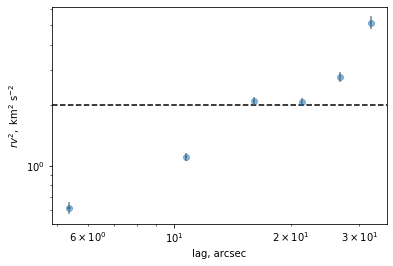

In [78]:
sfn_s=sosfnorm(dataSstat)

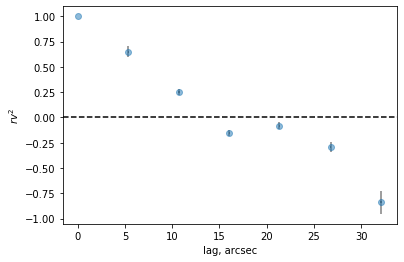

In [79]:
af_s=acf(dataSstat)

Since the image has missing data the FFT can not be performed.
To resolve this issue we filter again raw data but just for [SII]

In [80]:
ms=(data_0.RA<125)&(data_0.RA>90)
dataS2=data_0[ms]
dataS2.describe()

,RA,DE,Halpha,RVHalpha,SigmHalpha,[NII]6548,RV[NII]6548,Sigm[NII]6548,[NII]6584,RV[NII]6584,Sigm[NII]6584,[SII]6717,RV[SII]6717,Sigm[SII]6717,[SII]6731,RV[SII]6731,Sigm[SII]6731
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,107.942146,10.579399,1636.473047,-234.201416,15.894206,93.210515,-232.662747,24.730000,279.626266,-208.656137,24.544335,113.475064,-182.340429,13.377425,78.445579,-208.660687,13.299013
std,10.099726,7.014388,2049.633929,14.246970,6.831436,133.697767,15.026245,32.942844,401.076996,14.945718,32.783791,140.889574,22.551080,21.711924,103.226802,22.499614,21.675200
min,91.190000,0.000000,54.730000,-264.950000,5.150000,3.710000,-269.990000,6.590000,11.120000,-245.780000,6.430000,-5.140000,-258.280000,0.000000,-8.590000,-284.430000,0.000000
25%,99.230000,5.000000,385.200000,-242.610000,11.120000,15.610000,-241.230000,10.520000,46.820000,-217.180000,10.390000,26.660000,-190.470000,2.140000,14.430000,-216.770000,1.880000
50%,107.280000,11.000000,784.100000,-232.880000,14.280000,31.140000,-230.520000,15.740000,93.420000,-206.530000,15.600000,53.710000,-182.120000,8.670000,31.540000,-208.440000,8.590000
75%,116.670000,15.000000,1863.000000,-223.380000,19.530000,111.700000,-224.020000,27.430000,335.000000,-200.060000,27.250000,142.900000,-176.140000,14.120000,96.260000,-202.470000,14.050000
max,124.710000,22.000000,9957.000000,-207.300000,49.400000,814.900000,-140.140000,273.380000,2445.000000,-116.630000,271.920000,748.800000,10.850000,174.090000,563.600000,-15.900000,173.690000


In [81]:
a=[dataS2.RA,dataS2.DE,dataS2['RV[SII]6731']]
dataS2stat=pd.DataFrame(a).T
dataS2stat.columns=['X','Y','RV']
dataS2stat.describe()

,X,Y,RV
count,233.000000,233.000000,233.000000
mean,107.942146,10.579399,-208.660687
std,10.099726,7.014388,22.499614
min,91.190000,0.000000,-284.430000
25%,99.230000,5.000000,-216.770000
50%,107.280000,11.000000,-208.440000
75%,116.670000,15.000000,-202.470000
max,124.710000,22.000000,-15.900000


(0.0, 26.0, 0.0, 9.0)

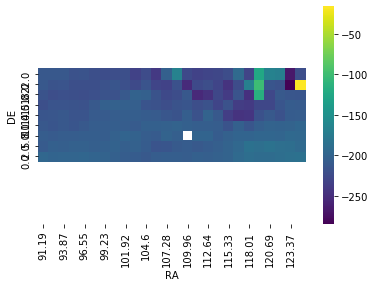

In [82]:
dataS2_rv=(dataS2.round(2)).pivot(index='DE', columns='RA', values='RV[SII]6731')
#fig, ax = plt.subplots(figsize=(11, 3))
sns.heatmap(dataS2_rv, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

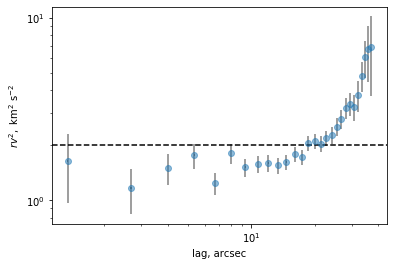

In [83]:
sfn_s2=sosfnorm(dataS2stat)

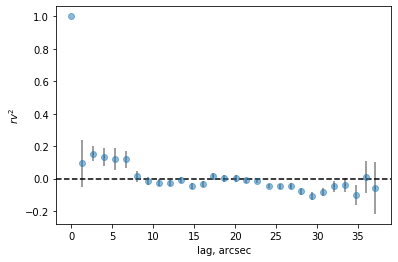

In [84]:
af_s2=acf(dataS2stat)

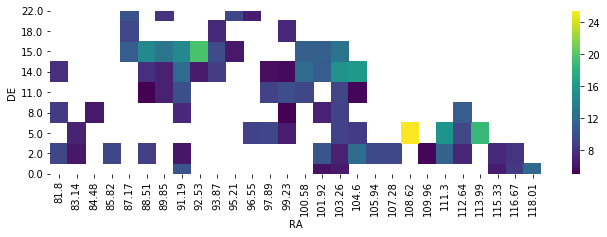

In [85]:
fig, ax = plt.subplots(figsize=(11, 3))
sns.heatmap(dataS_s, cmap="viridis")
plt.gca().invert_yaxis()

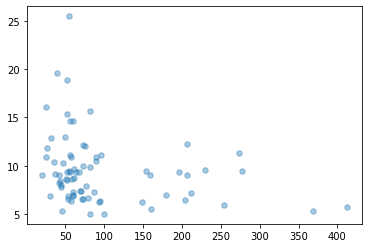

In [86]:
plt.scatter(dataS['[SII]6731'],dataS['Sigm[SII]6731'], alpha=0.4, s=30)

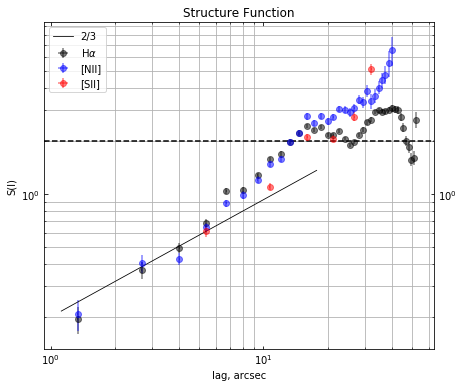

In [95]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfn_h2['Lag'],sfn_h2['Nmqvd'],xerr=sfn_h2.ErrX,yerr=sfn_h2.ErrY, fmt="o",color='k', ecolor='k', alpha=0.5, label=r'H$\alpha$')
ax.errorbar(sfn_n['Lag'],sfn_n['Nmqvd'],xerr=sfn_n.ErrX,yerr=sfn_n.ErrY, fmt="o",color='b', ecolor='b', alpha=0.5, label='[NII]')
#ax.errorbar(sfn_O2['Lag'],sfn_O2['Nmqvd'],xerr=sfn_O2.ErrX,yerr=sfn_O2.ErrY, fmt="o",color='g', ecolor='g', alpha=0.5, label='[OIII]')
ax.errorbar(sfn_s['Lag'],sfn_s['Nmqvd'],xerr=sfn_s.ErrX,yerr=sfn_s.ErrY, fmt="o",color='r', ecolor='r', alpha=0.5, label='[SII]')
ax.set(xscale='log',yscale='log')
sgrid = np.logspace(.05, 1.25)
ax.plot(sgrid, 0.2*sgrid**(2/3), color="k", lw=0.8, label='2/3')
ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag, arcsec', ylabel='S(l)')
plt.title('Structure Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')

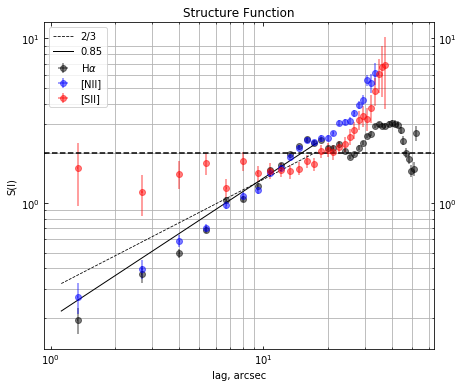

In [113]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfn_h2['Lag'],sfn_h2['Nmqvd'],xerr=sfn_h2.ErrX,yerr=sfn_h2.ErrY, fmt="o",color='k', ecolor='k', alpha=0.5, label=r'H$\alpha$')
ax.errorbar(sfn_n2['Lag'],sfn_n2['Nmqvd'],xerr=sfn_n2.ErrX,yerr=sfn_n2.ErrY, fmt="o",color='b', ecolor='b', alpha=0.5, label='[NII]')
#ax.errorbar(sfn_O2['Lag'],sfn_O2['Nmqvd'],xerr=sfn_O2.ErrX,yerr=sfn_O2.ErrY, fmt="o",color='g', ecolor='g', alpha=0.5, label='[OIII]')
ax.errorbar(sfn_s2['Lag'],sfn_s2['Nmqvd'],xerr=sfn_s2.ErrX,yerr=sfn_s2.ErrY, fmt="o",color='r', ecolor='r', alpha=0.5, label='[SII]')
ax.set(xscale='log',yscale='log')
sgrid = np.logspace(.05, 1.25)
ax.plot(sgrid, 0.3*sgrid**(2/3), color="k", lw=0.8, label='2/3', linestyle='--')
ax.plot(sgrid, 0.2*sgrid**(0.85), color="k", lw=1, label='0.85')

ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag, arcsec', ylabel='S(l)')
plt.title('Structure Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')

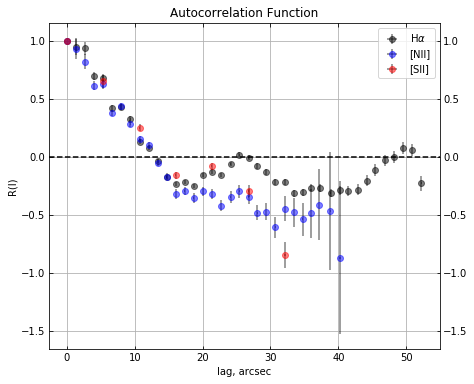

In [100]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(af_h2['Lag'],af_h2['Nmqvd'],xerr=af_h2.ErrX,yerr=af_h2.ErrY, fmt="o",color='k', ecolor='k', alpha=0.5,label=r'H$\alpha$')
ax.errorbar(af_n['Lag'],af_n['Nmqvd'],xerr=af_n.ErrX,yerr=af_n.ErrY, fmt="o",color='b', ecolor='k', alpha=0.5,label='[NII]')
#ax.errorbar(af_O2['Lag'],af_O2['Nmqvd'],xerr=af_O2.ErrX,yerr=af_O2.ErrY, fmt="o",color='g', ecolor='g', alpha=0.5, label='[OIII]')
ax.errorbar(af_s['Lag'],af_s['Nmqvd'],xerr=af_s.ErrX,yerr=af_s.ErrY, fmt="o",color='r', ecolor='k', alpha=0.5,label='[SII]')
#x.set(xscale='log')
ax.axhline(y=0, color='k', linestyle='--')
ax.set(xlabel='lag, arcsec', ylabel='R(l)')
plt.title('Autocorrelation Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend()
plt.grid()


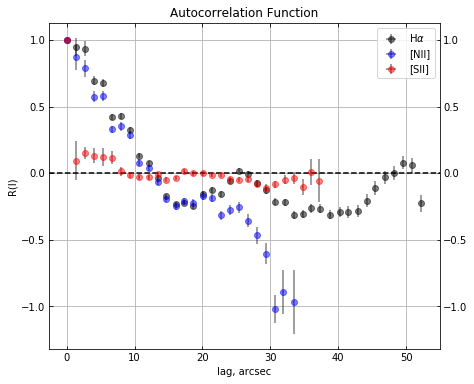

In [98]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(af_h2['Lag'],af_h2['Nmqvd'],xerr=af_h2.ErrX,yerr=af_h2.ErrY, fmt="o",color='k', ecolor='k', alpha=0.5,label=r'H$\alpha$')
ax.errorbar(af_n2['Lag'],af_n2['Nmqvd'],xerr=af_n2.ErrX,yerr=af_n2.ErrY, fmt="o",color='b', ecolor='k', alpha=0.5,label='[NII]')
#ax.errorbar(af_O2['Lag'],af_O2['Nmqvd'],xerr=af_O2.ErrX,yerr=af_O2.ErrY, fmt="o",color='g', ecolor='g', alpha=0.5, label='[OIII]')
ax.errorbar(af_s2['Lag'],af_s2['Nmqvd'],xerr=af_s2.ErrX,yerr=af_s2.ErrY, fmt="o",color='r', ecolor='k', alpha=0.5,label='[SII]')
#x.set(xscale='log')
ax.axhline(y=0, color='k', linestyle='--')
ax.set(xlabel='lag, arcsec', ylabel='R(l)')
plt.title('Autocorrelation Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend()
plt.grid()


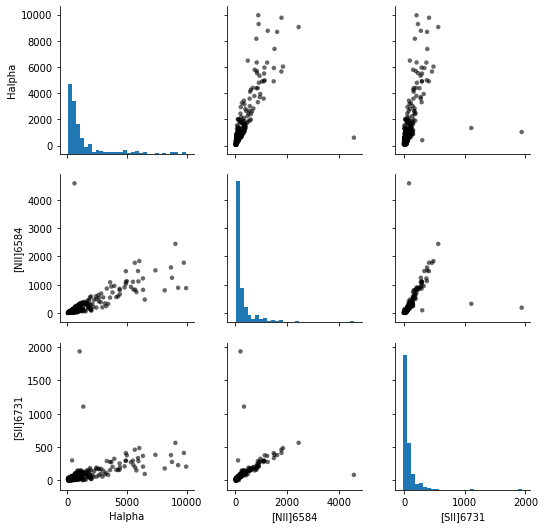

In [101]:
sns.pairplot(data,
             vars=["Halpha", "[NII]6584", "[SII]6731"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.6, s=20, edgecolor='none', color='k'),
             diag_kws=dict(bins=30),
            )